## Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are a type of machine learning algorithm used for classification and regression analysis. SVMs work by finding the optimal hyperplane that separates the data into different classes. The hyperplane is chosen to maximize the margin between the closest data points from each class, also known as the support vectors. This margin is the distance between the hyperplane and the closest data points from each class. 

We have decided to utilise this model and performed analysis based on the following steps:
1. Preparing data (upsample, obtain top 10 features, prep data to suit model)
2. Training SVM Model on full dataset (all 96 features)
3. Training SVM Model with only top 10 features
4. Generating ROC and AUC for both models and perform comparision evaluation




**Conclusion**

Using SVM, we concluded that the model trained on the full dataset (Model 1) is more accurate (**93.30%**) compared to the model trained on the top 10 variables (Model 2) (**86.55%**). Plotting the ROC and obtaining the AUC, we obtained an AUC of **0.97** for Model 1 and **0.93** for Model 2. We can conclude that the SVM model is thus able to distinguish between positive and negative cases very well, and is an almost perfect classifier.

### 1. Preparing Data

##### a) Importing necessary libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#for upsampling
from sklearn.utils import resample

#for svm model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# 

##### b) Upsampling Data

In [29]:
# Load the data from CSV file
df = pd.read_csv("bankruptcy.csv")
# df.head()

# Separate majority and minority classes
df_majority = df[df["Bankrupt?"] == 0]
df_minority = df[df["Bankrupt?"] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled["Bankrupt?"].value_counts()

0    6599
1    6599
Name: Bankrupt?, dtype: int64

##### c) Obtaining Top 10 Variables

In [30]:
corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
top_corr_features

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Net worth/Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)']

In [31]:
# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy

corr_matrix = df_upsampled.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10_upsampled = df_upsampled[top_corr_features]
top_corr_features


[' Debt ratio %',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' ROA(C) before interest and depreciation before interest',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(A) before interest and % after tax',
 ' Net Value Per Share (B)',
 ' Net Income to Total Assets']


If the top correlated features are similar for the original and upsampled datasets, but in a different order, it could mean that the distribution of the feature values has changed slightly after upsampling, but the overall relationship between the features and the target variable "Bankrupt?" remains the same. It's also possible that the difference in feature order is just due to random variation in the correlation values, especially if the correlation values are similar in magnitude for the top features.

In any case, it's a good sign that the top correlated features are similar for the original and upsampled datasets, because it suggests that the upsampling process has not introduced major changes to the underlying relationships between the features and the target variable. However, it's still important to evaluate the performance of any model trained on the upsampled data to ensure that it generalizes well to new, unseen data.

##### d) Ensuring assumptions for SVM model are adhered to

In [32]:
# select columns that are not numerical
non_numeric_cols = df_upsampled.select_dtypes(exclude=['int64', 'float64', 'complex128'])

# print the non-numerical columns
if not non_numeric_cols.empty:
    print(f"The non-numerical columns are: {', '.join(non_numeric_cols.columns)}")
else:
    print("All columns are numerical.")

All columns are numerical.


### 2. Train SVM Model on full dataset

In [33]:

X = df_upsampled.drop("Bankrupt?", axis=1)
y = df_upsampled["Bankrupt?"]
X = pd.get_dummies(X, drop_first=True) # encode categorical variables
X = StandardScaler().fit_transform(X) # scale numerical variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train an SVM model with RBF kernel
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9446    0.9140    0.9291      1268
           1     0.9229    0.9504    0.9364      1372

    accuracy                         0.9330      2640
   macro avg     0.9337    0.9322    0.9328      2640
weighted avg     0.9333    0.9330    0.9329      2640



### 3. Train SVM Model with only top 10 features

In [34]:
X_top10_upsample = df_top10_upsampled
y_top10_upsample = df_upsampled["Bankrupt?"]

X2 = df_top10_upsampled
y2 = df_upsampled["Bankrupt?"]
X2 = pd.get_dummies(X2, drop_first=True) # encode categorical variables
X2 = StandardScaler().fit_transform(X2) # scale numerical variables

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Train an SVM model with RBF kernel
model_top10 = SVC(kernel='rbf', probability=True)
model_top10.fit(X_train2, y_train2)

# Evaluate the model on the testing set
y_pred2 = model_top10.predict(X_test2)
print(classification_report(y_test2, y_pred2, digits=4))

              precision    recall  f1-score   support

           0     0.8684    0.8486    0.8584      1268
           1     0.8630    0.8812    0.8720      1372

    accuracy                         0.8655      2640
   macro avg     0.8657    0.8649    0.8652      2640
weighted avg     0.8656    0.8655    0.8655      2640



Precision: The precision is the ratio of true positive predictions to the total number of positive predictions. It measures the accuracy of positive predictions. A high precision indicates that the model has a low false positive rate.

Recall: The recall is the ratio of true positive predictions to the total number of actual positive instances. It measures the completeness of positive predictions. A high recall indicates that the model has a low false negative rate.

F1-score: The F1-score is the harmonic mean of precision and recall. It combines both metrics into a single score that balances precision and recall.

Support: The support is the number of actual occurrences of each class in the test set.

Accuracy: The accuracy is the ratio of correct predictions to the total number of predictions.

Macro/micro averages: The macro average calculates the metric for each class and then takes the average. The micro average calculates the metric globally by counting the total true positives, false negatives, and false positives.

### 4. Generating ROC and AUC for both models

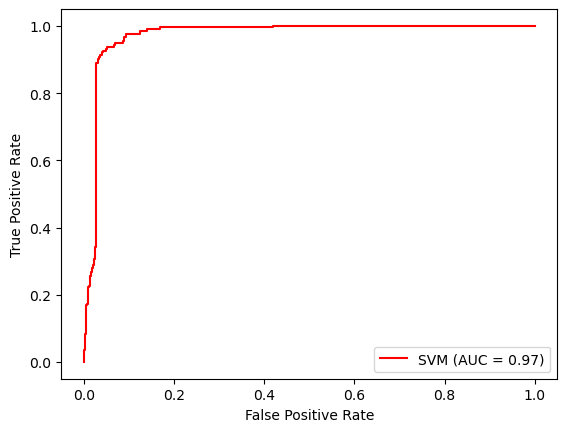

In [35]:
# predict probabilities with SVM model for all variables
svm_probs = model.decision_function(X_test)

# compare the predicted probabilities
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# plot the ROC curve
plt.plot(fpr_svm, tpr_svm, color='red', label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

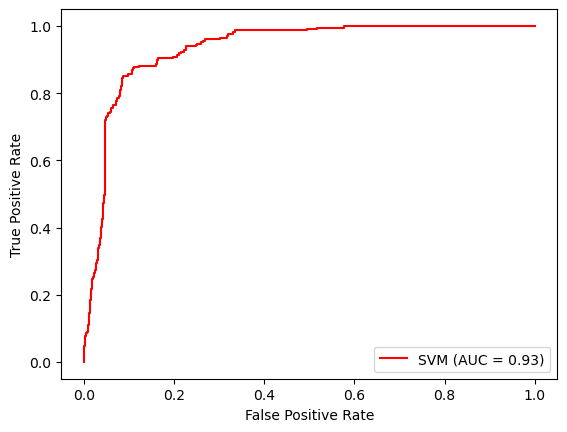

In [36]:
# predict probabilities with SVM model for all variables
svm_probs = model_top10.decision_function(X_test2)

# compare the predicted probabilities
fpr_svm, tpr_svm, _ = roc_curve(y_test2, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# plot the ROC curve
plt.plot(fpr_svm, tpr_svm, color='red', label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()